# Spot the difference

So in this num(meth)math project I shall be doing a basic
spotting the difference program \
\
Theres two method of doing this, one method is the easy way of importing a library and everything could be done in 4 lines of code and of course the hard way which is doing it using matplotlib, and we will doing both method, because where is the fun in just importing a library that could do that in two lines

## Image Spliter
\
If the image to compare is one picture we have to split the image using a image-slicer library \
We have to install the image_slicer library using \
``pip install image_slicer``

In [93]:
# Import the good stuff

from image_slicer import slice

In [95]:
# Path of the image

path = "Split/image.jpeg"

# Slice the image into 2

slice(path, 2)

(<Tile #1 - image_01_01.png>, <Tile #2 - image_01_02.png>)

### Now we have two images

<table><tr>
<td> <img src="Split/image_01_01.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Split/image_01_02.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

### Path to the two file

In [24]:
img1path = "Spot1/Spot1_01_01.png"
img2path = "Spot1/Spot1_01_02.png"

## Method 1 - the easy way
(props to geeksforgeeks)\
We will be using a library called "Pillow"

1. Install pillow using
``pip install pillow``

2. We start implementing

In [25]:
# Import the good stuff

from PIL import Image, ImageChops

In [26]:
# The case that you have two seperate images to compare

img1 = Image.open(img1path)
img2 = Image.open(img2path)

In [28]:
# finding difference

diff = ImageChops.difference(img1, img2)
  
# showing the difference

diff.save("result.jpeg")

#### Result

<table><tr>
<td> <img src="Spot1/1img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="result.jpeg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="Spot1/2img.jpeg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

I know the output is a bit hard to see but you can match it with the original image to see the difference

## Method 2 - The matplotlib way
Mario but find the difference \
why am I still here? just to suffer

In [160]:
# Again importing the good stuff

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import math
import cv2

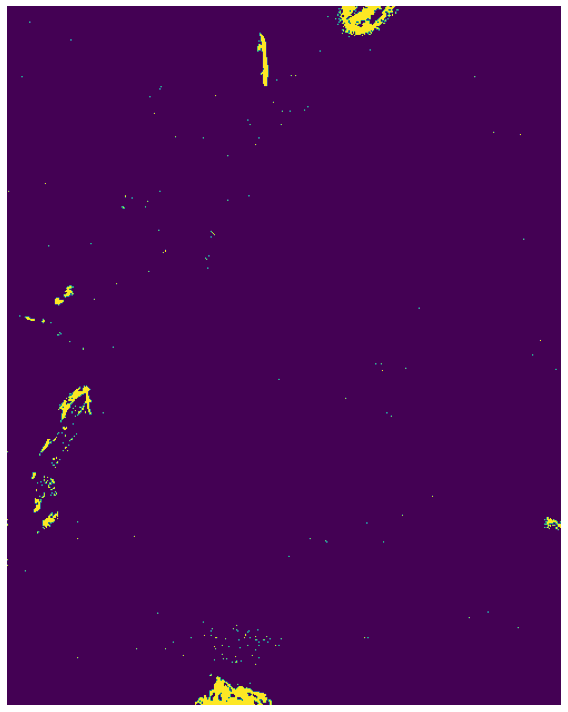

In [267]:
img1 = plt.imread(img1path)
img2 = plt.imread(img2path)

# isSame function returns boolean if the pixel is the same

def isSame(x, y):
    diff = img1[y,x]-img2[y,x]
    return all(diff < 0.2)

# edge function to check 

def edge(img):
    ny, nx, _ = img.shape
    ret = np.zeros((ny, nx))
    for y in range(ny):
        for x in range(nx):
#             ret[y,x] = 1
            ret[y, x] = 0 if isSame(x,y) else 1
    return ret


plt.figure(figsize = (15,10))
edges = edge(img1)
plt.imshow(edges)
plt.axis('off')
plt.tight_layout()
plt.savefig('color_diff.png', bbox_inches='tight', pad_inches=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


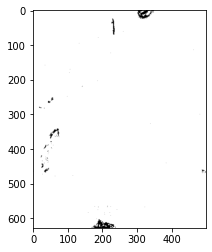

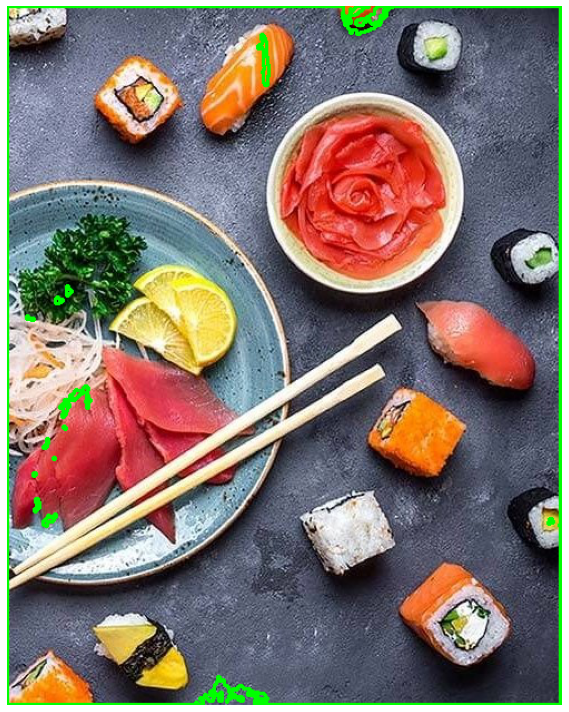

In [272]:
image = cv2.imread("color_diff.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)
# show it

binary = cv2.resize(binary, (498, 628))

plt.imshow(binary, cmap="gray")
# plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image2 = cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)
# print(image.shape)

# show the image with the drawn contours
plt.figure(figsize = (15,10))
plt.imshow(image2)
plt.axis('off')
plt.tight_layout()

#Saving the file
plt.savefig('result_diff.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()